Inserting all libraries that will need.
Reading dataset using pandas.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("neo.csv")


Here we targeting column is Hazardous, so we are converting it into o and 1 that is:
0 for non-hazardous
1 for hazardous

We separate our dataset into:
y: target column we want to predict(hazardous).
X: column we used for prediction.

In [2]:
df['hazardous'] = df['hazardous'].astype(int)   # True/False → 1/0

target = "hazardous"
y = df[target]  # Target/Hazard label

X = df.drop(columns=[target])  # Remove target from features
X = X.select_dtypes(include=['number'])  # Keep only numeric data


Then we splitted dataset into:
80% training
20% testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


We created random forest model with 200 trees and train it on training dataset.
The 'class_weight='balanced' helps to handle balancing in dataset.

In [4]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

We used the trained model to predict on the test data (y_pred).

Then we check models performance:
Accuracy -> overall correctness of model (multiplying by 100 to get in %).
Classification report -> includes precision, recall and F1-score.


In [5]:
y_pred = rf.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



--- Model Evaluation ---
Accuracy: 95.24988991633641

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     16439
           1       0.86      0.60      0.70      1729

    accuracy                           0.95     18168
   macro avg       0.91      0.79      0.84     18168
weighted avg       0.95      0.95      0.95     18168



Confusion matrix -> Shows correct and incorrect predictions.

annot = True -> Shows the numbers inside each box of the heat map.
fmt = "d" -> format those numbers as integers.

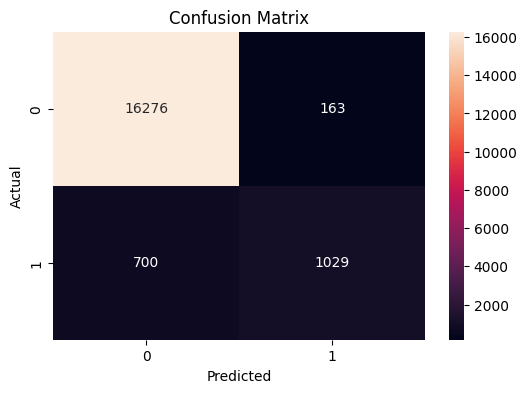

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()